# E-commerce Customer Purchase Intentions

## Overview

The `online_shoppers_intention.csv` includes 12,330 sessions of online traffic to an unknown website over the period of a year. The column 'Revnue' contains a True or False value that displays whether or not a website viewer purchases the product. This serves as the target variable for the clasification problem. Using the other columns provided, we can create a classification model that can predict whether a site visitor will purhase the product.

The primary evaluation metric will be Recall because it indicates the amount of true positives that the model predicts. In this business context, false negatives are intolerable because that would inaccurately represent sales. We will also be looking at F1 score and other metrics.

## Primary Business Problem
How can the company increase conversion rate among customers who visit the website?

From the distrbution of 'Revenue' in this dataset, it's clear that 85% of people who visited the website that year did not convert to a customer. To solve this problem, we'll investigate what factors impact this decision.

![imbalance](./visualizations/class_imbalance.png)

## Data Understanding
This project uses the **Online Shoppers Purchasing Intention Dataset** from the UCI Machine Learning Repository. The data has been cleaned in 'eda_notebook.ipynb' and imported here for modeling use.

The research study gathered data from each session of website traffic over the 1-year period. The 'Revenue' column was used as the target variable in this classification project. Below is a description of each column in the original dataset.

## Model Data Import

In [25]:
# import libraries
import pandas as pd
pd.options.display.max_columns = 50
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
from sklearn.preprocessing import StandardScaler, binarize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFECV, SelectKBest, f_regression
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, plot_confusion_matrix, roc_curve, auc, classification_report
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV

In [6]:
# loading in cleaned dataset
model_df = pd.read_csv('model_data.csv', index_col = 0)

In [7]:
model_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,Returning_Visitor,True,False


## Data Preperation 

### Creating Dummy Columns from Categorical Varibales

In [8]:
# selecting categorical variables to dummy
model_df = pd.get_dummies(model_df, columns=['SpecialDay', 'Month', 'OperatingSystems','Browser','Region','TrafficType','VisitorType','Weekend'])

In [9]:
model_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Revenue,SpecialDay_0.0,SpecialDay_0.2,SpecialDay_0.4,SpecialDay_0.6,SpecialDay_0.8,SpecialDay_1.0,Month_2,Month_3,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,...,TrafficType_1,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,TrafficType_10,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,False,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,False,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,False,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,False,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,False,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


### Dummying 'Revenue' Target

In [10]:
model_df['Revenue'] = model_df['Revenue'].astype(int)

## Train-Test Split

In [11]:
# Split data to be used in the models
X = model_df.drop('Revenue', axis = 1)

# Create target variable
y = model_df['Revenue'] # y is the column we're trying to predict

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11)

## Evaluation Metric
Before starting the final modeling process, we must decide on the evaluation metrics. The main metric we will focus on is Recall, but we'll also examine F1.

This is because:
- Recall is used in this context where false negatives are intolerable. The true positive rate must be higher because the company needs to know how many people actually purchased the product.
- F1 Score is useful in cases where there is a large class imalance.

## Creating Baseline Decision Tree
Decision Tree model are the most suitable for this context because if you tune the hyperparaters appropriately, they are prone to overfitting.

### Baseline Decision Tree
Creating a Decision Tree model without any hyperparameters

In [13]:
baseline_tree = DecisionTreeClassifier()
baseline_tree = baseline_tree.fit(X_train, y_train)

In [14]:
# predict the training set
tree_y_pred_train = baseline_tree.predict(X_train)

# Predict the for test set
tree_y_pred_test = baseline_tree.predict(X_test)

In [15]:
print('Baseline Decision Tree Model')
print("Training F1 Score: ", metrics.f1_score(y_train, tree_y_pred_train))
print("Training Recall: ", metrics.recall_score(y_train, tree_y_pred_train))

print("Testing F1 Score: ", metrics.f1_score(y_test, tree_y_pred_test))
print("Testing Recall: ", metrics.recall_score(y_test, tree_y_pred_test))

Baseline Decision Tree Model
Training F1 Score:  1.0
Training Recall:  1.0
Testing F1 Score:  0.5609007164790173
Testing Recall:  0.5557809330628803


In [16]:
# creating dictionary with all metrics
metric_dict = {}
metric_dict['Baseline Decision Tree'] = {'train_f1': metrics.f1_score(y_train, tree_y_pred_train),
                                      'test_f1': metrics.f1_score(y_test, tree_y_pred_test),
                                      'train_recall': metrics.recall_score(y_train, tree_y_pred_train),
                                      'test_recall': metrics.recall_score(y_test, tree_y_pred_test)}

The training score for both recall and F1 are 1 because the model was never told to stop, so it's severely overfit.

It got a testing recall and f1 of both .56389. This is strange, but it's not a great score because it's basically randomly guessing. So let's try to improve it and see if they differ in the next iteration.

From here, we set max_depth=6 to prematurely stop the model to prevent overfitting.

## Model Iterations

In [17]:
# creating decision tree with max_depts=3
depth_3_tree = DecisionTreeClassifier(random_state=3, criterion='gini', max_depth=3)
depth_3_tree = depth_3_tree.fit(X_train, y_train)

# predict the training set
second_tree_y_pred_train = depth_3_tree.predict(X_train)
# predict for test set
second_tree_y_pred_test = depth_3_tree.predict(X_test)

In [21]:
print('Decision Tree Model with max_depth of 3:')
print("Training F1 Score: ", metrics.f1_score(y_train, second_tree_y_pred_train))
print("Training Recall: ", metrics.recall_score(y_train, second_tree_y_pred_train))

print("Testing F1 Score: ", metrics.f1_score(y_test, second_tree_y_pred_test))
print("Testing Recall: ", metrics.recall_score(y_test, second_tree_y_pred_test))

Decision Tree Model with max_depth of 3:
Training F1 Score:  0.6576677915260593
Training Recall:  0.6197879858657244
Testing F1 Score:  0.6368593238822247
Testing Recall:  0.592292089249493


In [19]:
# add this model's metrics to the dictionary
metric_dict['max_depth=3'] = {'train_f1': metrics.f1_score(y_train, second_tree_y_pred_train),
                                      'test_f1': metrics.f1_score(y_test, second_tree_y_pred_test),
                                      'train_recall': metrics.recall_score(y_train, second_tree_y_pred_train),
                                      'test_recall': metrics.recall_score(y_test, second_tree_y_pred_test)}

We can see that the training and testing scores are not too different, so this is a sign that the model is only slightly overfit.

The testing F1 is .63 and the testing recall is .59. This isn't a great improvement from the baseline, so we'll need to try something else. First, let's fix the class imbalance problem

## Fixing Class Imalance with SMOTE
We use SMOTE to upsample the minority class, which is when there is revenue.

In [26]:
sm = SMOTE(random_state=23)
smote_X_train, smote_y_train = sm.fit_sample(X_train, y_train)
smote_X_test, smote_y_test = sm.fit_sample(X_test, y_test)

In [27]:
# creating decision tree with max_depts=3
smote_tree = DecisionTreeClassifier(random_state=3, criterion='gini', max_depth=3)
smote_tree = smote_tree.fit(smote_X_train, smote_y_train)

# predict the training set
smote_tree_y_pred_train = depth_3_tree.predict(smote_X_train)
# predict for test set
smote_tree_y_pred_test = depth_3_tree.predict(smote_X_test)

In [28]:
print('Baseline Decision Tree Model using Smote to upsample the minority')
print("Training F1 Score: ", metrics.f1_score(smote_y_train, smote_tree_y_pred_train))
print("Training Recall: ", metrics.recall_score(smote_y_train, smote_tree_y_pred_train))

print("Testing F1 Score: ", metrics.f1_score(smote_y_test, smote_tree_y_pred_test))
print("Testing Recall: ", metrics.recall_score(smote_y_test, smote_tree_y_pred_test))

Baseline Decision Tree Model using Smote to upsample the minority
Training F1 Score:  0.635917892462395
Training Recall:  0.48850868232890704
Testing F1 Score:  0.6080286371771926
Testing Recall:  0.45907335907335906


In [ ]:
# adding metrics to dictionary
metric_dict['SMOTE on max_depth=3'] = {'train_f1': metrics.f1_score(smote_y_train, smote_tree_y_pred_train),
                                      'test_f1': metrics.f1_score(smote_y_test, smote_tree_y_pred_test),
                                      'train_recall': metrics.recall_score(smote_y_train, smote_tree_y_pred_train),
                                      'test_recall': metrics.recall_score(smote_y_test, smote_tree_y_pred_test)}

**Metric Evaluation here**

## Fixing Class Imalance with `class_weight=balanced` Instead
Using this hyperparameter, it takes the inverse proportion of the class weights.

In [32]:
# creating decision tree with max_depts=3
balanced_tree = DecisionTreeClassifier(random_state=3, criterion='gini', max_depth=3, class_weight='balanced')
balanced_tree = balanced_tree.fit(X_train, y_train)

# predict the training set
balanced_tree_y_pred_train = balanced_tree.predict(X_train)
# predict for test set
balanced_tree_y_pred_test = balanced_tree.predict(X_test)

In [33]:
print('Balanced DT using class_weight:')
print("Training F1 Score: ", metrics.f1_score(y_train, balanced_tree_y_pred_train))
print("Training Recall: ", metrics.recall_score(y_train, balanced_tree_y_pred_train))

print("Testing F1 Score: ", metrics.f1_score(y_test, balanced_tree_y_pred_test))
print("Testing Recall: ", metrics.recall_score(y_test, balanced_tree_y_pred_test))

Balanced DT using class_weight:
Training F1 Score:  0.6412899814961671
Training Recall:  0.8572438162544169
Testing F1 Score:  0.6614906832298136
Testing Recall:  0.8640973630831643


In [34]:
metric_dict['Class Balanced on max_depth=3'] = {'train_f1': metrics.f1_score(y_train, balanced_tree_y_pred_train),
                                      'test_f1': metrics.f1_score(y_test, balanced_tree_y_pred_test),
                                      'train_recall': metrics.recall_score(y_train, balanced_tree_y_pred_train),
                                      'test_recall': metrics.recall_score(y_test, balanced_tree_y_pred_test)}

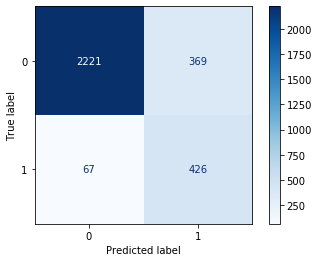

In [35]:
plot_confusion_matrix(balanced_tree, X_test, y_test, cmap=plt.cm.Blues)

![tree](./visualizations/max_depth3_tree.png)

## Feature Selection with Recursive Feature Elimination (RFSE)
Explain what RFSE does

In [37]:
# creating decision tree with max_depts=3
selection_tree = DecisionTreeClassifier(random_state=3, criterion='gini', max_depth=3, class_weight='balanced')

# predict the training set
balanced_tree_y_pred_train = balanced_tree.predict(X_train)
# predict for test set
balanced_tree_y_pred_test = balanced_tree.predict(X_test)

In [38]:
# Create recursive feature eliminator that scores features by f1 score
selector = RFECV(estimator=selection_tree, step=1, cv=5, scoring='f1', n_jobs=-1)

# Fit recursive feature eliminator 
selector.fit(X_train, y_train)

RFECV(cv=5,
      estimator=DecisionTreeClassifier(class_weight='balanced', max_depth=3,
                                       random_state=3),
      n_jobs=-1, scoring='f1')

In [39]:
selected_rfe = X_train.columns[selector.support_]
removed_rfe = X_train.columns[~selector.support_]

In [40]:
#instantiate a decision tree object
selection_tree = DecisionTreeClassifier(random_state=3, criterion='gini', max_depth=6, class_weight='balanced')

#fit the linear regression to the data
selection_tree = selection_tree.fit(X_train[selected_rfe], y_train)

y_rfe = selection_tree.predict(X_train[selected_rfe])
trainRFE_f1 = np.sqrt(metrics.f1_score(y_train, y_rfe))
print('Training F1:' , trainRFE_f1)

y_pred_rfe = selection_tree.predict(X_test[selected_rfe])
testRFE_f1 = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfe))
print('Testing F1:' , testRFE_f1)

# looking at recall 
trainRFE_recall = np.sqrt(metrics.recall_score(y_train, y_rfe))
print('Training Recall:' , trainRFE_recall)
testRFE_recall = np.sqrt(metrics.recall_score(y_test, y_pred_rfe))
print('Testing Recall:' , testRFE_recall)

Training F1: 0.8139925329425362
Testing F1: 0.3538399703522451
Training Recall: 0.8960060575262172
Testing Recall: 0.8951072776709804


In [41]:
metric_dict['RFECV on max_depth=3'] = {'train_f1': trainRFE_f1,
                                      'test_f1': testRFE_f1,
                                      'train_recall': trainRFE_recall,
                                      'test_recall': testRFE_recall}

** evalute metrics**

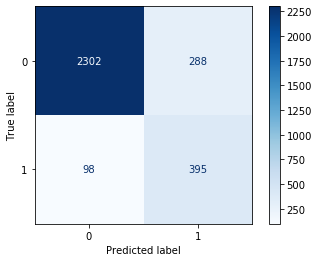

In [42]:
plot_confusion_matrix(selection_tree, X_test[selected_rfe], y_test, cmap=plt.cm.Blues)

## Evaluation of Model Iterations
Display pandas dataframe with evaluation metrics for all iterations

In [43]:
pd.DataFrame.from_dict(metric_dict, orient='index')

,train_f1,test_f1,train_recall,test_recall
Baseline Decision Tree,1.000000,0.560901,1.000000,0.555781
max_depth=3,0.657668,0.636859,0.619788,0.592292
Class Balanced on max_depth=3,0.641290,0.661491,0.857244,0.864097
RFECV on max_depth=3,0.813993,0.353840,0.896006,0.895107


## Final Model 

## Final Model Analysis